In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Historical Product Demand.csv')  
data.head(8)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500


In [3]:
#data['Order_Demand'] = data['Order_Demand'].str.replace(r'\D', '', regex=True)

# Convert the cleaned values to numeric, with errors coerced to NaN
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'], errors='coerce')
#data['Product_Category '] = pd.to_numeric(data['Order_Demand'], errors='coerce')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1048575 non-null  object 
 1   Warehouse         1048575 non-null  object 
 2   Product_Category  1048575 non-null  object 
 3   Date              1037336 non-null  object 
 4   Order_Demand      1038106 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [5]:
data['Date']= pd.to_datetime(data['Date'])
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000.0
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1.0
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500.0
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50.0


In [6]:
data['Date'].dt.to_period('M')

0          2012-07
1          2012-01
2          2012-02
3          2012-02
4          2012-03
            ...   
1048570    2016-04
1048571    2016-04
1048572    2016-04
1048573    2016-10
1048574    2016-06
Name: Date, Length: 1048575, dtype: period[M]

In [7]:
data['Month'] = pd.to_datetime(data['Date']).dt.month
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Month
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,7.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,1.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,3.0
...,...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000.0,4.0
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1.0,4.0
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500.0,4.0
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50.0,10.0


In [8]:
data = data.dropna()

In [9]:
data['Month'] = data['Month'].astype(int)

C:\Users\jhala\AppData\Local\Temp\ipykernel_33344\1523112826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Month'].astype(int)


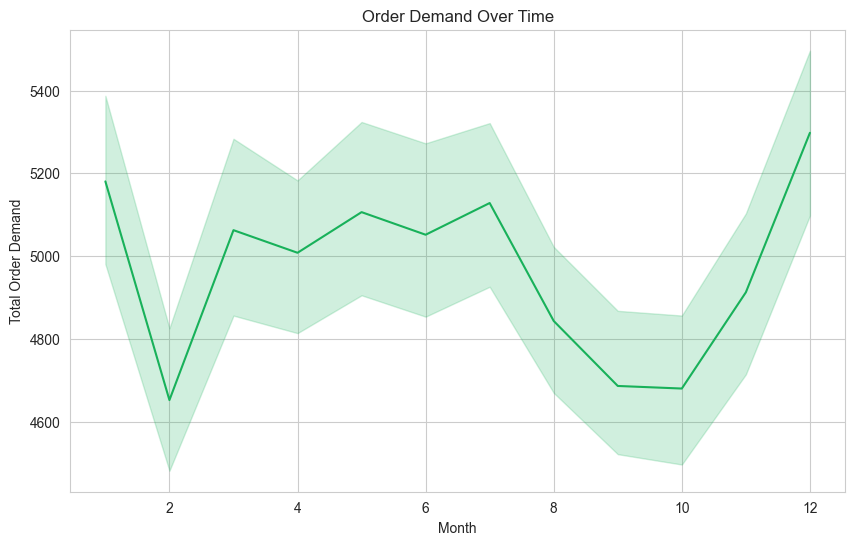

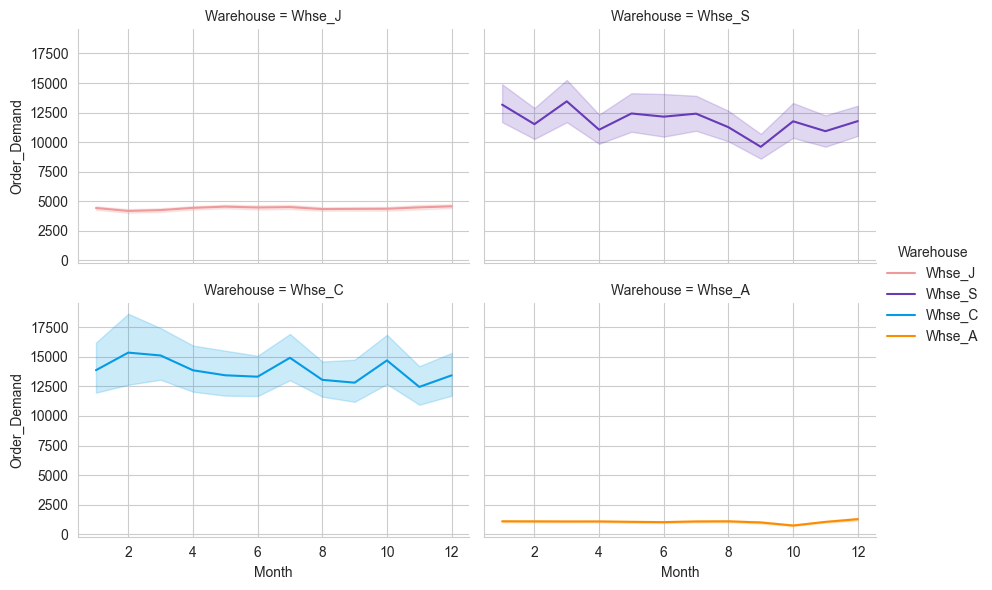

In [10]:
sns.set_style("whitegrid") #Set tje style
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='Order_Demand', color = '#18B15A')
plt.title('Order Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Total Order Demand')
plt.show()


g = sns.relplot(data=data, 
                x='Month', 
                y='Order_Demand', 
                kind="line",
                hue='Warehouse',
                palette=["#EF9A9A", "#673AB7", "#039BE5", "#FB8C00"],
                col='Warehouse',  # Facet by 'Warehouse'
                col_wrap=2,  
                height=3, aspect=1.5)
plt.show()

In [11]:
result=data.groupby(['Month','Product_Category'])['Order_Demand'].sum().reset_index()
print(result)

     Month Product_Category  Order_Demand
0        1     Category_001      137541.0
1        1     Category_002          41.0
2        1     Category_003       27167.0
3        1     Category_004        6855.0
4        1     Category_005    18049765.0
..     ...              ...           ...
384     12     Category_029        1846.0
385     12     Category_030     3641856.0
386     12     Category_031         700.0
387     12     Category_032      493472.0
388     12     Category_033     3620000.0

[389 rows x 3 columns]


In [12]:
result['Product_Category_Code'] = pd.factorize(result['Product_Category'])[0] + 1

In [13]:
result.head(7)

,Month,Product_Category,Order_Demand,Product_Category_Code
0,1,Category_001,137541.0,1
1,1,Category_002,41.0,2
2,1,Category_003,27167.0,3
3,1,Category_004,6855.0,4
4,1,Category_005,18049765.0,5
5,1,Category_006,33054456.0,6
6,1,Category_007,10588466.0,7


In [14]:
result.tail()

,Month,Product_Category,Order_Demand,Product_Category_Code
384,12,Category_029,1846.0,28
385,12,Category_030,3641856.0,29
386,12,Category_031,700.0,30
387,12,Category_032,493472.0,31
388,12,Category_033,3620000.0,32


In [15]:
data['Month'].isna().sum()

0

In [38]:
#result['Product_Category'] = pd.to_numeric(result['Product_Category'], errors='coerce')
result=result.drop(labels=["Product_Category"],axis=1)

In [39]:
result.to_csv('data.csv', index=False)

In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  389 non-null    int32  
 1   Product_Category       389 non-null    object 
 2   Order_Demand           389 non-null    float64
 3   Product_Category_Code  389 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 10.8+ KB


In [18]:
X=result.drop(labels=["Order_Demand","Product_Category"],axis=1)
y=result["Order_Demand"]

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train

,Month,Product_Category_Code
328,11,6
358,12,3
309,10,18
68,3,4
285,9,27
...,...,...
312,10,21
376,12,20
210,7,17
258,8,32


In [21]:
y_train

328     34817707.0
358        34259.0
309    371916736.0
68         10040.0
285      4233168.0
          ...     
312        42989.0
376       323886.0
210         3623.0
258      3090000.0
344        49444.0
Name: Order_Demand, Length: 350, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.28332164, -1.14686855],
       [ 1.57254415, -1.46842048],
       [ 0.99409912,  0.13933917],
       [-1.03045852, -1.36123651],
       [ 0.7048766 ,  1.10399496],
       [ 0.12643156,  0.13933917],
       [-0.741236  , -1.14686855],
       [ 1.28332164, -1.03968458],
       [ 0.99409912, -1.14686855],
       [-0.16279096,  0.78244303],
       [ 0.12643156,  0.99681099],
       [ 0.12643156, -0.28939674],
       [ 0.12643156,  0.56807508],
       [ 0.41565408, -0.18221276],
       [ 1.28332164,  0.24652315],
       [-1.03045852, -1.68278844],
       [-1.03045852, -0.50376469],
       [ 1.57254415, -0.39658071],
       [ 0.7048766 ,  0.24652315],
       [ 0.7048766 , -1.25405253],
       [-0.741236  ,  0.67525905],
       [ 0.41565408, -0.9325006 ],
       [-0.45201348,  1.10399496],
       [-0.741236  , -1.36123651],
       [-0.16279096, -0.9325006 ],
       [ 0.99409912, -0.50376469],
       [ 0.12643156, -1.36123651],
       [-0.741236  , -1.57560446],
       [-1.60890356,

In [24]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.99409912, -0.82531662],
       [-1.03045852,  1.42554689],
       [-1.31968104,  1.42554689],
       [ 0.99409912, -1.36123651],
       [ 0.41565408,  1.74709882],
       [-1.60890356, -1.14686855],
       [-1.31968104, -1.68278844],
       [-0.16279096,  1.10399496],
       [-1.31968104,  1.74709882],
       [-1.03045852, -0.07502878],
       [ 0.12643156, -0.39658071],
       [-1.31968104, -1.46842048],
       [-0.16279096,  1.74709882],
       [ 0.7048766 , -1.03968458],
       [-0.45201348,  0.88962701],
       [ 0.12643156,  1.21117894],
       [ 1.28332164,  1.53273087],
       [-1.31968104, -0.50376469],
       [-1.03045852, -1.57560446],
       [ 0.7048766 , -0.39658071],
       [ 0.12643156,  0.67525905],
       [-1.31968104, -1.14686855],
       [ 0.7048766 , -0.61094867],
       [-0.45201348, -1.68278844],
       [-0.45201348, -1.03968458],
       [ 0.99409912,  1.10399496],
       [ 0.99409912,  1.74709882],
       [-0.45201348, -1.36123651],
       [-1.31968104,

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from xgboost import XGBRegressor

In [26]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [27]:
r2_list=[]
acc_list=[]

In [28]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest']

In [29]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest'])

In [30]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    acc=accuracy_score(true,pred)

    return mae, mse,r2,acc

In [31]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    


    print("model training performance",model)
    print("MSE:", mse)
    print("MAE:",mae)
    print("R2 SCORE:",r2)
    

    r2_list.append(r2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 3220049254194106.0
MAE: 21444260.302560598
R2 SCORE: -0.010692265532145306


model training performance Lasso()
MSE: 3220049233724389.0
MAE: 21444260.50053558
R2 SCORE: -0.010692259107217383


model training performance Ridge()
MSE: 3219955002673517.5
MAE: 21444143.31058589
R2 SCORE: -0.01066268235643797


model training performance ElasticNet()
MSE: 3209227570164817.0
MAE: 21430282.928326614
R2 SCORE: -0.007295611790222312


model training performance RandomForestRegressor()
MSE: 3597720881497.9434
MAE: 507947.14974358963
R2 SCORE: 0.9988707661338604




In [40]:
re=pd.read_csv("data.csv")
re

,Month,Order_Demand,Product_Category_Code
0,1,137541.0,1
1,1,41.0,2
2,1,27167.0,3
3,1,6855.0,4
4,1,18049765.0,5
...,...,...,...
384,12,1846.0,28
385,12,3641856.0,29
386,12,700.0,30
387,12,493472.0,31
